In [8]:
#!pip install pandas

In [67]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [68]:
# Generating our dataframe
df = pd.read_csv('/home/ornela/audio_feature_songs/audio_features_10_songs/df_audio_features_5000.csv')
df = df.drop(columns= 'Unnamed: 0')

In [69]:
df.head(2)
print(df.columns)

Index(['name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')


In [70]:
# Strip whitespace from column names
#df.columns = [col.strip() for col in df.columns]
df = df.rename(columns=lambda x: x.strip())
# Now print the cleaned column names to verify
#print(df.columns)
# Define the columns you want to drop
to_drop = ['key', 'loudness', 'duration_ms','speechiness','time_signature', 'id', 'html']

# Drop the columns from the DataFrame
df_songs = df.drop(columns=to_drop)

# df_songs will now have the specified columns removed
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              5235 non-null   object 
 1   artist            5235 non-null   object 
 2   danceability      5235 non-null   float64
 3   energy            5235 non-null   float64
 4   mode              5235 non-null   int64  
 5   acousticness      5235 non-null   float64
 6   instrumentalness  5235 non-null   float64
 7   liveness          5235 non-null   float64
 8   valence           5235 non-null   float64
 9   tempo             5235 non-null   float64
 10  type              5235 non-null   object 
dtypes: float64(7), int64(1), object(3)
memory usage: 450.0+ KB


In [71]:
df_songs.head(2)
df_songs.describe()

,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000
mean,0.509503,0.653565,0.646227,0.290043,0.257337,0.185354,0.443596,118.721407
std,0.218041,0.288335,0.478185,0.355985,0.370686,0.149410,0.277725,28.568463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.309000,0.479000,0.000000,0.002450,0.000001,0.092500,0.196000,96.174000
50%,0.539000,0.738000,1.000000,0.095400,0.001880,0.125000,0.417000,119.180000
75%,0.688000,0.893000,1.000000,0.565500,0.643000,0.237000,0.677000,134.019000
max,0.967000,1.000000,1.000000,0.996000,0.985000,0.987000,0.985000,213.990000


In [14]:
import pandas as pd
from sklearn.metrics import pairwise_distances

# Select only the numeric columns for distance calculation
numeric_cols = df_songs.select_dtypes(include=[np.number])

# Now calculate the pairwise distances
distances_array = pairwise_distances(numeric_cols, metric='euclidean')


In [15]:
euclidean_distances_df_songs = pd.DataFrame(distances_array,
                                           index = df_songs.index,
                                           columns = df_songs.index)

In [16]:
#euclidean_distances_df_songs

In [17]:
#plt.subplots(figsize=(10, 6));
#sns.heatmap(euclidean_distances_df_songs);

Distance calculation with preprocessing and normalization! 

In [72]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer

# MinMax_Scalerization

In [73]:
# Strip whitespace from column names
#df.columns = [col.strip() for col in df.columns]
df = df.rename(columns=lambda x: x.strip())
# Now print the cleaned column names to verify
#print(df.columns)

# Define the columns you want to drop
df_drop = ['key', 'loudness', 'duration_ms','speechiness','time_signature','type' 'id', 'html']

# Drop the columns from the DataFrame
df_clean = df.drop(columns=to_drop)

df_clean = df_clean.set_index(['name', 'artist'])

In [74]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5235 entries, ('Se Eu Quiser Falar Com Deus                                                                                                                                                      ', 'Gilberto Gil                                    ') to ('Ravel: Boléro, M. 81                                                                                                                                                           ', 'Maurice Ravel                                   ')
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   mode              5235 non-null   int64  
 3   acousticness      5235 non-null   float64
 4   instrumentalness  5235 non-null   float64
 5   liveness          5235 non-null   float64
 6   valence           5235 non-null   float64
 7   tempo  

In [75]:
df_mm = df_clean.copy()

In [76]:
df_mm.head()

,,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo,type
name,artist,,,,,,,,,
Se Eu Quiser Falar Com Deus,Gilberto Gil,0.658,0.2590,0,0.694,0.000059,0.975,0.306,110.376,
Saudade De Bahia,Antônio Carlos Jobim,0.742,0.3990,1,0.217,0.000002,0.107,0.693,125.039,
"Canta Canta, Minha Gente",Martinho Da Vila,0.851,0.7300,1,0.453,0.000063,0.124,0.905,93.698,
Mulher Eu Sei,Chico César,0.705,0.0502,1,0.879,0.000041,0.386,0.524,106.802,
Rosa Morena,Kurt Elling,0.651,0.1190,1,0.916,0.000343,0.104,0.402,120.941,


In [77]:
df_mm.describe()

,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo
count,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000,5235.000000
mean,0.509503,0.653565,0.646227,0.290043,0.257337,0.185354,0.443596,118.721407
std,0.218041,0.288335,0.478185,0.355985,0.370686,0.149410,0.277725,28.568463
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.309000,0.479000,0.000000,0.002450,0.000001,0.092500,0.196000,96.174000
50%,0.539000,0.738000,1.000000,0.095400,0.001880,0.125000,0.417000,119.180000
75%,0.688000,0.893000,1.000000,0.565500,0.643000,0.237000,0.677000,134.019000
max,0.967000,1.000000,1.000000,0.996000,0.985000,0.987000,0.985000,213.990000


In [78]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns for scaling
numeric_cols = df_mm.select_dtypes(include=[np.number])

# Initialize the MinMaxScaler
#scaler = MinMaxScaler()
scaler = MinMaxScaler().set_output(transform = 'pandas')
# Scale the numeric data
df_minmax = scaler.fit_transform(numeric_cols)

# Convert the scaled data back to a DataFrame
# Use the numeric columns' names for the DataFrame
#df_minmax = pd.DataFrame(df_minmax, columns=numeric_cols.columns)

# Display the first few rows of the scaled DataFrame
#df_minmax.head()



In [79]:
# heatmap min_max
min_max_distances = pd.DataFrame(pairwise_distances(df_minmax),
                                index = df_mm.index,
                                columns = df_mm.index)

In [88]:
#plt.subplots(figsize = (10, 6));
#sns.heatmap(min_max_distances);

# Standard scaler normalization

In [21]:
df_ss = df_clean.copy()

In [16]:
# Select only numeric columns for scaling
numeric_cols = df_ss.select_dtypes(include=[np.number])

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the numeric data
df_standardscaler = scaler.fit_transform(numeric_cols)

# Convert the scaled data back to a DataFrame
# Use the numeric columns' names for the DataFrame
df_standardscaler = pd.DataFrame(df_standardscaler, columns=numeric_cols.columns)

# Display the first few rows of the scaled DataFrame
df_standardscaler.head()

,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo
0,0.681116,-1.368556,-1.351545,1.134867,-0.694125,5.285610,-0.495488,-0.292147
1,1.066401,-0.882963,0.739894,-0.205206,-0.694278,-0.524470,0.898109,0.221160
2,1.566355,0.265117,0.739894,0.457807,-0.694112,-0.410678,1.661526,-0.875994
3,0.896692,-2.092782,0.739894,1.654602,-0.694174,1.343056,0.289535,-0.417262
4,0.649009,-1.854148,0.739894,1.758549,-0.693358,-0.544551,-0.149790,0.077701


In [17]:
standard_scaler_distances = pd.DataFrame(pairwise_distances(df_standardscaler),
                                                           index = df_ss.index,
                                                           columns = df_ss.index)           

In [18]:
#plt.subplots(figsize = (10, 6));
#sns.heatmap(standard_scaler_distances);

# Robust scaler normalization

In [19]:
df_rs = df_clean.copy()

In [20]:
# Select only numeric columns for scaling
numeric_cols = df_rs.select_dtypes(include=[np.number])

# Initialize the StandardScaler
scaler = RobustScaler()

# Scale the numeric data
df_robustscaler = scaler.fit_transform(numeric_cols)

# Convert the scaled data back to a DataFrame
# Use the numeric columns' names for the DataFrame
df_robustscaler = pd.DataFrame(df_robustscaler, columns=numeric_cols.columns)

# Display the first few rows of the scaled DataFrame
df_robustscaler.head()

,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo
0,0.313984,-1.157005,-1.0,1.063138,-0.002833,5.882353,-0.230769,-0.232633
1,0.535620,-0.818841,0.0,0.215967,-0.002921,-0.124567,0.573805,0.154816
2,0.823219,-0.019324,0.0,0.635112,-0.002825,-0.006920,1.014553,-0.673325
3,0.437995,-1.661353,0.0,1.391706,-0.002861,1.806228,0.222453,-0.327071
4,0.295515,-1.495169,0.0,1.457419,-0.002390,-0.145329,-0.031185,0.046532


In [21]:
robust_scaler_distances = pd.DataFrame(pairwise_distances(df_robustscaler), 
                                      index = df_rs.index,
                                      columns = df_rs.index)        

In [22]:
#plt.subplots(figsize = (10,6));
#sns.heatmap(robust_scaler_distances);

# Transformers 

# Quantile transformers

In [23]:
df_qt = df_clean.copy()

In [24]:
# Select only numeric columns for transformation
numeric_cols = df_qt.select_dtypes(include=[np.number])

# Initialize the QuantileTransformer
qt = QuantileTransformer(n_quantiles=numeric_cols.shape[0], output_distribution='uniform')



In [25]:
# Apply the QuantileTransformer to the numeric data
df_quantiletransformed = qt.fit_transform(numeric_cols)

# Convert the transformed data back to a DataFrame
df_quantiletransformed = pd.DataFrame(df_quantiletransformed, columns=numeric_cols.columns)

# If you want to recombine with non-numeric data
non_numeric_cols = df_qt.select_dtypes(exclude=[np.number])
df_qt_transformed = pd.concat([df_quantiletransformed, non_numeric_cols], axis=1)

# Display the first few rows of the transformed DataFrame
df_qt_transformed.head()

,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo,name,type
0,0.701662,0.145969,0.0,0.791173,0.385460,0.999045,0.376576,0.409534,Se Eu Quiser Falar Com Deus ...,
1,0.834066,0.206916,1.0,0.610145,0.268055,0.369316,0.762323,0.593332,Saudade De Bahia ...,
2,0.962457,0.490638,1.0,0.717329,0.388804,0.491880,0.942205,0.196408,"Canta Canta, Minha Gente ...",
3,0.780378,0.037830,1.0,0.864540,0.373710,0.919182,0.609954,0.371227,Mulher Eu Sei ...,
4,0.689243,0.079862,1.0,0.883359,0.443256,0.343523,0.486339,0.529996,Rosa Morena ...,


In [26]:
quantile_transform_distances = pd.DataFrame(pairwise_distances(df_quantiletransformed), 
                                           index = df_qt.index,
                                           columns = df_qt.index)

In [27]:
#plt.subplots(figsize = (10,6));
#sns.heatmap(quantile_transform_distances);

# Power transformer

In [28]:
df_pt = df_clean.copy()

In [29]:
from sklearn.preprocessing import PowerTransformer

# Select only numeric columns for transformation
numeric_cols = df_pt.select_dtypes(include=[np.number])

# Initialize the PowerTransformer
power_transformer = PowerTransformer()

# Apply the PowerTransformer to the numeric data
df_powertransformed = power_transformer.fit_transform(numeric_cols)

# Convert the transformed data back to a DataFrame
df_powertransformer = pd.DataFrame(df_powertransformed, columns=numeric_cols.columns, index=numeric_cols.index)

# Calculate pairwise distances using the transformed data
power_transformer_distances = pd.DataFrame(pairwise_distances(df_powertransformer),
                                           index=df_powertransformer.index,
                                           columns=df_powertransformer.index)

# Display the first few rows of the pairwise distances DataFrame
power_transformer_distances.head()


,0,1,2,3,4,5,6,7,8,9,...,5225,5226,5227,5228,5229,5230,5231,5232,5233,5234
0,0.000000,3.803984,4.147290,2.355047,3.415794,3.802182,3.446159,3.315323,3.821566,4.146958,...,4.050705,5.147082,4.225264,4.100391,5.105796,4.930830,5.053710,5.527733,4.971625,3.858067
1,3.803984,0.000000,1.944350,2.606818,1.746525,2.409593,3.318105,3.333481,1.822544,2.906327,...,4.259589,4.797416,3.376540,4.056886,5.799910,4.544516,4.587180,5.295919,4.967386,4.448191
2,4.147290,1.944350,0.000000,2.976891,2.799533,3.597207,3.426397,2.787149,2.955812,2.355407,...,4.940052,5.527702,4.280960,4.965839,6.155838,5.179112,5.205030,5.801805,5.391653,4.585861
3,2.355047,2.606818,2.976891,0.000000,2.194055,2.852128,3.488666,2.418212,2.908713,3.413473,...,3.724142,4.735921,3.523065,4.426562,5.541291,4.457311,4.589353,5.122925,4.548533,3.286951
4,3.415794,1.746525,2.799533,2.194055,0.000000,1.545222,3.118529,3.601468,2.332561,3.104561,...,3.232168,3.786297,2.618882,3.441701,4.933509,3.547067,3.567046,4.333839,4.007802,3.750453


# Elbow Model

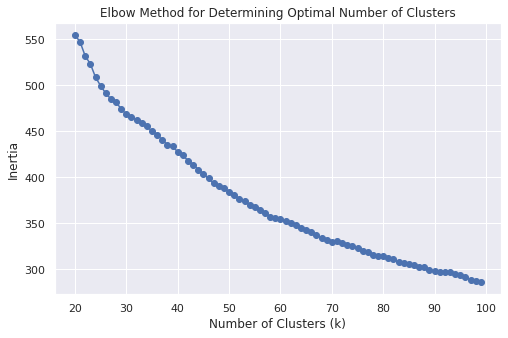

In [80]:
from sklearn.cluster import KMeans
# Range of k values to test
K = range(20,100)  # You can adjust this range as needed

# List to store the inertias for each model with different k
inertias = []

for k in K:
    # Initialize the KMeans model
    model = KMeans(n_clusters=k, n_init='auto', random_state=321)
    model.fit(df_minmax)
    # Append the inertia (sum of squared distances within clusters) to the list
    inertias.append(model.inertia_)

# Create the elbow plot
plt.figure(figsize=(8, 5))
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.show()


In [27]:
# 1 Using Inertia and elbow plot:

seed = 321

max_k = 100

inertia_list = []

for i in range(20, max_k):
        my_kmeans = KMeans(n_clusters = i,
                          n_init = 'auto',
                          random_state = seed)
        my_kmeans.fit(df_minmax)
        inertia_list.append(my_kmeans.inertia_)

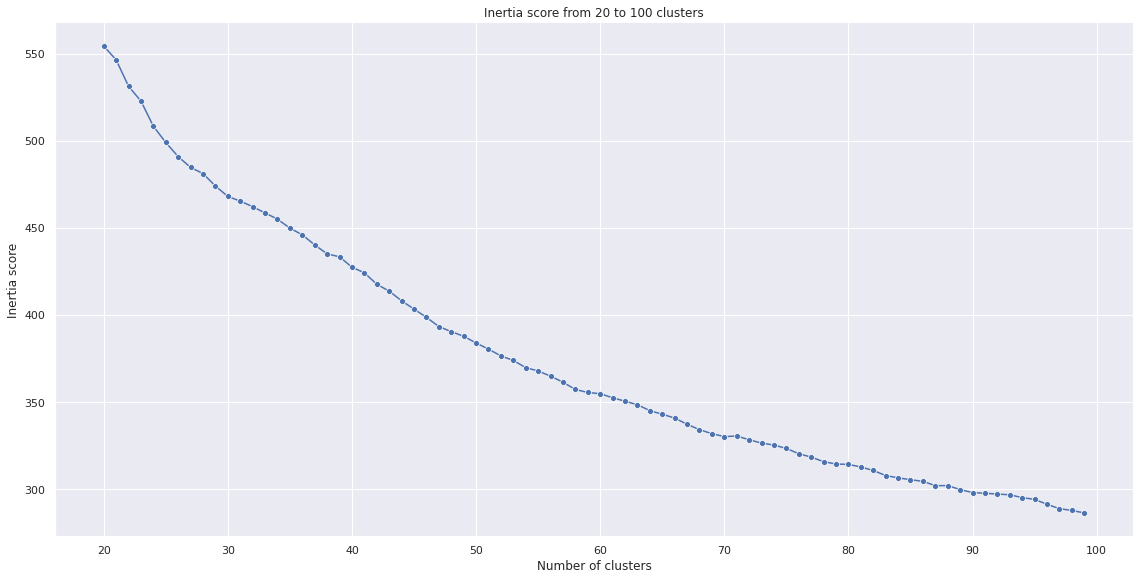

In [28]:
# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

(
# Create a line plot of the inertia scores
sns.relplot(y = inertias,
            x = range(20,max_k),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 20 to 100 clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

KeyError: 'y'

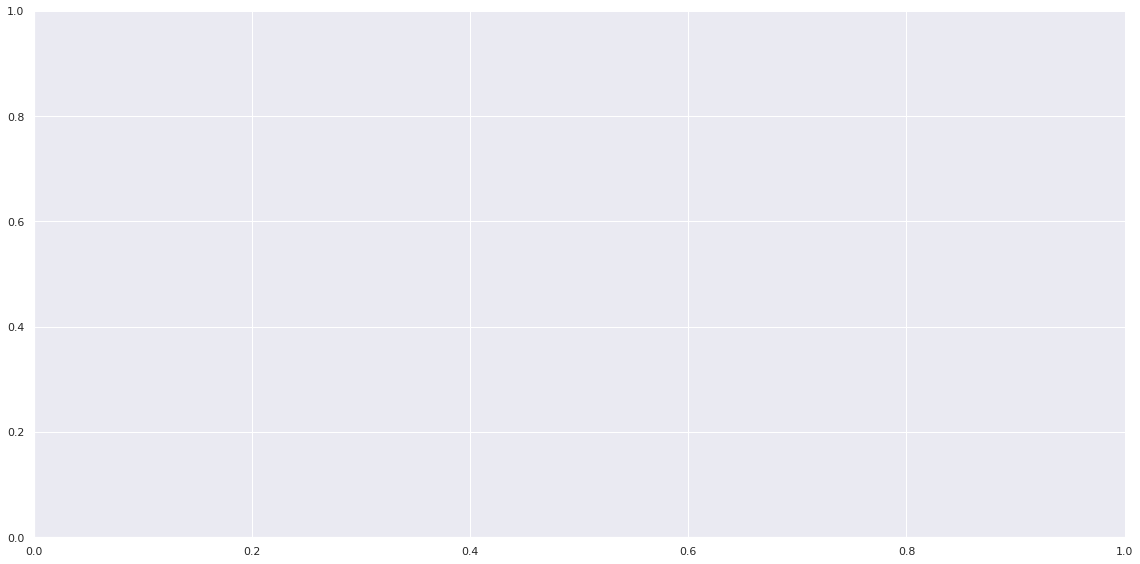

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming inertia_list and max_k are predefined, but as they are not provided,
# I will create a mock list for demonstration purposes.
# Normally, these would be the actual results from a clustering algorithm like K-means.

# Mock data for demonstration
max_k = 100
#inertia_list = [1 / (i + 1) ** 0.5 for i in range(20, max_k)]

# Set the Seaborn theme to darkgrid
sns.set_theme(style='darkgrid')

# Create a line plot of the inertia scores
plot = sns.relplot(y=inertias, x=range(20, max_k), kind='line', marker='o', height=8, aspect=2)

# Set the title of the plot
plot.set(title=f"Inertia score from 20 to {max_k} clusters")

# Set the axis labels
plot.set_axis_labels("Number of clusters", "Inertia score")

# Saving the plot as a JPEG file
plt.savefig('/home/ornela/audio_feature_songs/inertia_plot.jpeg', format='jpeg')

# Displaying the plot
plt.show()


# silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

## Range of k values to test
k_values = range(20,101)  # Starting from 20 

# List to store the silhouette scores for each k
silhouette_scores = []

# Calculate silhouette scores for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=321)
    kmeans.fit(df_minmax)
    labels = kmeans.labels_
    score = silhouette_score(df_minmax, labels)
    silhouette_scores.append(score)

# Plotting the silhouette scores
#plt.figure(figsize=(10, 10))
#plt.plot(k_values, silhouette_scores, marker='o')
#plt.xlabel('Number of clusters (k)')
#plt.ylabel('Silhouette Score')
#plt.title('Silhouette Scores for Different Numbers of Clusters')
#plt.xticks(k_values)
#plt.grid(True)
#plt.show()

In [ ]:
# Set the maximum number of clusters to try
max_k = 101

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(20, max_k):

    # Create a KMeans object with the specified number of clusters
    kmeans = KMeans(n_clusters=j,
                    n_init="auto",
                    random_state = 321)

    # Fit the KMeans model to the scaled data
    kmeans.fit(df_minmax)

    # Get the cluster labels
    labels = kmeans.labels_

    # Calculate the silhouette score
    score = silhouette_score(df_minmax, labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

In [ ]:
sns.set_theme(style='darkgrid')

(
sns.relplot(y=sil_scores,
            x=range(20,max_k),
            kind='line',
            marker='o',
            height = 8,
            aspect=2)
.set(title=f"Silhouette score from 20 to 100 clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

# K-means

In [81]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import plotly.graph_objects as go

In [82]:
# Scale the data already
df_minmax.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 5235 entries, ('Se Eu Quiser Falar Com Deus                                                                                                                                                      ', 'Gilberto Gil                                    ') to ('Ravel: Boléro, M. 81                                                                                                                                                           ', 'Maurice Ravel                                   ')
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      5235 non-null   float64
 1   energy            5235 non-null   float64
 2   mode              5235 non-null   float64
 3   acousticness      5235 non-null   float64
 4   instrumentalness  5235 non-null   float64
 5   liveness          5235 non-null   float64
 6   valence           5235 non-null   float64
 7   tempo  

In [103]:
# Initialise the model
kmeans = KMeans(n_clusters = 22,
                  n_init = 'auto',
                  random_state = 321)

In [104]:
kmeans

KMeans(n_clusters=22, n_init='auto', random_state=321)

In [105]:
# Fit the model to the data
kmeans.fit(df_minmax)

KMeans(n_clusters=22, n_init='auto', random_state=321)

In [106]:
# Obtain the cluster output
clusters = kmeans.labels_

In [107]:
clusters

array([19,  1,  1, ..., 18, 18, 15], dtype=int32)

In [108]:
kmeans.labels_

array([19,  1,  1, ..., 18, 18, 15], dtype=int32)

In [109]:
kmeans.fit_predict(df_minmax)

array([19,  1,  1, ..., 18, 18, 15], dtype=int32)

In [110]:
# Attach the cluster output to our original DataFrame
df_minmax['cluster'] = clusters

In [111]:
df_minmax[['cluster']].sort_values('cluster')

,,cluster
name,artist,
Blackeye,Love Inks,0
Prison Break Anthem (Ich Glaub An Dich) - Single Version,Azad,0
Low (feat. T-Pain),Flo Rida,0
Look At Me Now,Chris Brown,0
"Te He Querido, Te He Llorado",Ivy Queen,0
...,...,...
Stuck with U - Piano Version,Flying Fingers,21
Blackbird,Elin Porsinger,21
La Javanaise,Serge Gainsbourg,21


In [112]:
df_minmax.groupby(by='cluster').mean() 

,danceability,energy,mode,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,
0,0.678601,0.801355,0.000000,0.070553,0.020358,0.179603,0.496172,0.553274
1,0.768735,0.618667,0.871429,0.234273,0.106189,0.123668,0.853909,0.514388
2,0.482740,0.587360,1.000000,0.404417,0.042067,0.305775,0.424699,0.525502
3,0.536198,0.551682,0.770370,0.453017,0.217369,0.293839,0.471867,0.535842
4,0.239143,0.914406,1.000000,0.006615,0.871200,0.201893,0.183207,0.564654
5,0.600589,0.668991,0.660754,0.210195,0.015866,0.159218,0.330375,0.574895
6,0.580465,0.740420,1.000000,0.056084,0.196352,0.164461,0.435875,0.523917
7,0.554130,0.486538,0.506250,0.614047,0.436856,0.153950,0.590378,0.662681
8,0.287187,0.947134,1.000000,0.002759,0.063544,0.130766,0.172415,0.561415


In [113]:
df_minmax.groupby('cluster')['cluster'].count().sort_values(ascending=False).to_frame().T

cluster,5,4,6,2,17,3,21,10,0,12,...,18,1,9,8,13,7,11,16,14,15
cluster,451,357,357,339,272,270,261,258,251,231,...,223,210,199,186,183,160,159,151,150,111


# Cluster analysis - Centroids

Heatmap plot

In [114]:
# Find the coordinates of each centroid using the cluster_centers_ attribute
centroids = kmeans.cluster_centers_

In [115]:
# Calculate the euclidean distance between the centroids
centroid_distances = pairwise_distances(centroids)

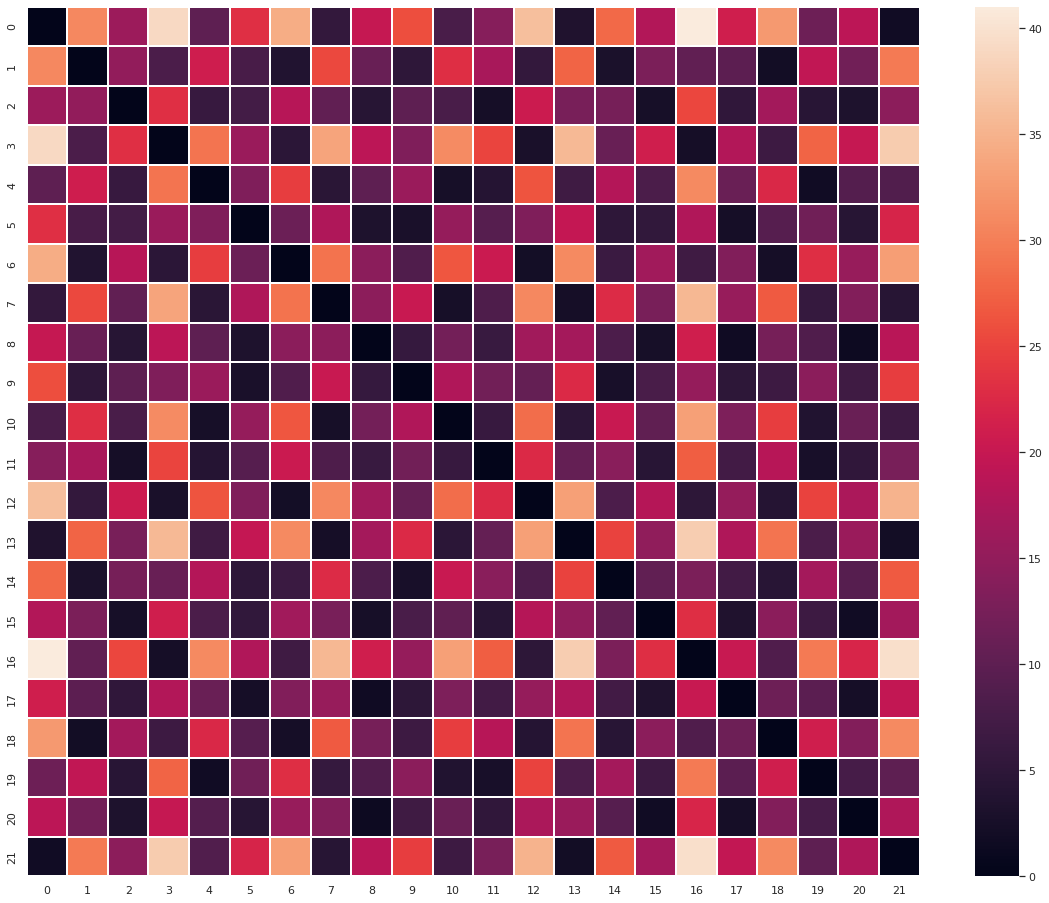

In [116]:
# Plot distances on heatmap
plt.subplots(figsize=(20, 16))
sns.heatmap(centroid_distances,
           linewidths=.2);

# Cluster analysis - Radar chart

In [117]:
# Calcola la media per ogni cluster
cluster_means = df_minmax.groupby(by='cluster').mean()

# Visualizza il risultato
print(cluster_means)


         danceability    energy      mode  acousticness  instrumentalness  \
cluster                                                                     
0            0.678601  0.801355  0.000000      0.070553          0.020358   
1            0.768735  0.618667  0.871429      0.234273          0.106189   
2            0.482740  0.587360  1.000000      0.404417          0.042067   
3            0.536198  0.551682  0.770370      0.453017          0.217369   
4            0.239143  0.914406  1.000000      0.006615          0.871200   
5            0.600589  0.668991  0.660754      0.210195          0.015866   
6            0.580465  0.740420  1.000000      0.056084          0.196352   
7            0.554130  0.486538  0.506250      0.614047          0.436856   
8            0.287187  0.947134  1.000000      0.002759          0.063544   
9            0.658499  0.542899  1.000000      0.699814          0.164904   
10           0.568192  0.599729  0.143411      0.489485          0.132481   

In [118]:
import plotly.graph_objects as go

# Definisci le categorie (caratteristiche) per il grafico radar
categories = ['danceability', 'energy', 'mode',
              'acousticness', 'instrumentalness', 'valence', 'tempo']
#get rid of speechiness, duration_ms and liveness!
# Verifica che tutte le categorie siano presenti nel DataFrame
categories = [col for col in categories if col in df_minmax.columns]

# Crea una lista vuota per memorizzare gli oggetti del grafico
trace_objects = []

# Itera sui numeri unici dei cluster e aggiungi un oggetto per ogni cluster alla lista
for cluster in sorted(df_minmax['cluster'].unique()):
    cluster_parameter_means = go.Scatterpolar(
        r=[df_minmax.loc[df_minmax["cluster"] == cluster, col].mean() for col in categories],
        theta=categories,
        fill='toself',
        name=f'Cluster {cluster}'
    )
    trace_objects.append(cluster_parameter_means)

# Aggiungi gli oggetti al grafico
fig = go.Figure()
fig.add_traces(trace_objects)

# Aggiungi extra al grafico come il titolo
fig.update_layout(
    title_text='Radar chart of mean parameters by cluster',
    height=600,
    width=800,
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, 1]  
        )
    ),
    showlegend=True
)

# Mostra il grafico inizializzato e i layer
fig.show()


In [124]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler


# Create the model
cluster_model = AgglomerativeClustering(n_clusters=22, linkage='ward')

# Fit the model and predict clusters
cluster_assignments = cluster_model.fit_predict(df_minmax)

# Analyze the cluster sizes
cluster_counts = pd.Series(cluster_assignments).value_counts()

# Print the number of songs in each cluster
print(cluster_counts)


11    451
3     438
2     419
5     388
0     339
1     306
20    272
4     267
15    258
17    251
7     231
10    210
9     208
8     199
12    186
14    151
6     150
13    137
21    111
16     98
19     86
18     79
dtype: int64


In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
pdf_path = '/home/ornela/audio_feature_songs/Agglomerative_Clustering_21.pdf'  
pdf = PdfPages(pdf_path)
# Set the Seaborn theme
sns.set_theme(style='darkgrid')

# Create the bar plot
plt.figure(figsize=(12, 6))

# Generate cluster numbers based on the length of cluster_counts
cluster_numbers = range(len(cluster_counts))

# Using a color palette for the plot. Here 'viridis' is used, but you can choose other palettes as well.
sns.barplot(x=cluster_numbers, y=cluster_counts, palette='viridis')

# Setting the title and labels
plt.title('Number of Songs in Each Cluster')
plt.xlabel('Cluster Number')
plt.ylabel('Number of Songs')

# Display the plot
#plt.show()
# Save the plot to the PDF and close the plot
pdf.savefig()
plt.close()

# Close the PDF
pdf.close()

# Create a bar plot
#plt.figure(figsize=(12, 6))
#sns.barplot(x=cluster_counts.index, y=cluster_counts.values)
#plt.title('Number of Songs in Each Cluster')
#plt.xlabel('Cluster Number')
#plt.ylabel('Number of Songs')
#plt.show()


<ipython-input-128-9887f2f44366>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




In [129]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib.backends.backend_pdf import PdfPages

# Assuming df_minmax is your pre-processed DataFrame
# Initialize the PDF file to save plots
pdf_path = '/home/ornela/audio_feature_songs/Agglomerative_Clustering_20-21.pdf'  
pdf = PdfPages(pdf_path)

# Iterate over different numbers of clusters
for n_clusters in range(20,23):
    # Create and fit the model
    cluster_model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    cluster_assignments = cluster_model.fit_predict(df_minmax)

    # Count songs in each cluster
    cluster_counts = pd.Series(cluster_assignments).value_counts()

    # Plotting with colors
    plt.figure(figsize=(12, 6))
    sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='viridis', legend=False)
    plt.title(f'Number of Songs in Each Cluster (n_clusters = {n_clusters})')
    plt.xlabel('Cluster Number')
    plt.ylabel('Number of Songs')

    # Save the plot to the PDF and close the plot
    pdf.savefig()
    plt.close()

# Close the PDF
pdf.close()
